In [1]:
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset = 'small/'
model_path = Path("/home/v-mezhang/blob/model/" + str(dataset))

In [3]:
policy = 'epsilon_greedy'
paras = [0, 0.1, 0.2, 0.3]
rewards = {}
opt_rewards = {}

In [4]:
policy_names = []
for para in paras:
    policy_name = policy + '_' + str(para)
    policy_names.append(policy_name)
# policy_names.append('ucb_0.1')
policy_names

['epsilon_greedy_0',
 'epsilon_greedy_0.1',
 'epsilon_greedy_0.2',
 'epsilon_greedy_0.3']

In [5]:
for policy_name in policy_names:
    with open(os.path.join(model_path, (policy_name + "_rewards.pkl")), "rb") as f:
        rewards[policy_name] = pickle.load(f)
    with open(os.path.join(model_path, (policy_name+ "_opt_rewards.pkl")), "rb") as f:
        opt_rewards[policy_name] = pickle.load(f)


In [6]:
cumu_regrets = {}
for para in policy_names:
    num_exper, num_sam = rewards[para].shape
    cumu_regrets[para] = np.zeros((num_exper, num_sam))
    for i in range(num_exper):
        cumu_reward = 0
        cumu_opt_reward = 0

        for j in range(num_sam):
            cumu_reward += rewards[para][i,j]
            cumu_opt_reward += opt_rewards[para][i,j]
            cumu_regrets[para][i,j] = (cumu_opt_reward - cumu_reward) #/(j+1)

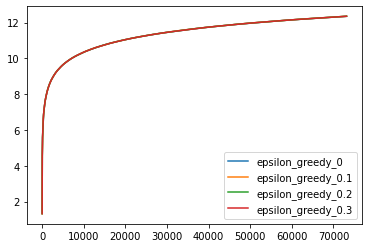

In [7]:
for policy_name, value in cumu_regrets.items():
    plt.plot(range(num_sam), np.log(value.mean(axis=0)), label = policy_name)
plt.legend()


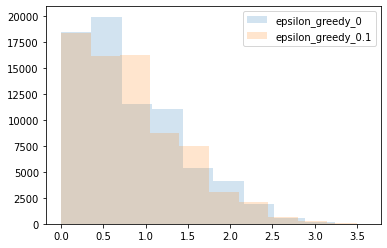

In [8]:
for policy_name, value in rewards.items():
    if policy_name in ['epsilon_greedy_0', 'epsilon_greedy_0.1']:
        plt.hist(value.mean(axis = 0), label = policy_name, alpha = 0.2)
plt.legend()

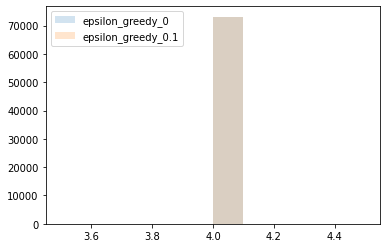

In [9]:
for policy_name, value in opt_rewards.items():
    if policy_name in ['epsilon_greedy_0', 'epsilon_greedy_0.1']:
        plt.hist(value.mean(axis = 0), label = policy_name, alpha = 0.2)
plt.legend()